# IPython Notebook In Depth

Today we are going to dive into some of the interesting features of IPython and the IPython notebook, which are useful for a number of daily tasks in data-intensive science.

We will work through these features "live"; feel free to type along with me as we go!

## Outline

- IPython: command-line vs. notebook
- Input/Output History
- Tab Completion
- Getting help and accessing documentation
- Useful Keyboard Shortcuts
- Magic Commands
- Shell commands
- Interactivity with ``ipywidgets``

## IPython Command Line and Notebook

### Launching the IPython Shell

If you have installed IPython correctly, you should be able to type ``ipython`` in your command prompt and see something like this:
```
IPython 4.0.1 -- An enhanced Interactive Python.
?         -> Introduction and overview of IPython's features.
%quickref -> Quick reference.
help      -> Python's own help system.
object?   -> Details about 'object', use 'object??' for extra details.
In [1]:
```
With that, you're ready to follow along.

### Launching the IPython Notebook

The IPython notebook is a browser-based graphical interface to the IPython shell, and builds on it a rich set of dynamic display capabilities.
As well as executing Python/IPython statements, the notebook allows the user to include formatted text, static and dynamic visualizations, mathematical equations, javascript widgets, and much more.
Furthermore, these documents can be saved in a way that lets other people open them and execute the code on their own systems.

Though the IPython notebook is viewed and edited through your web browser window, it must connect to a running Python process in order to execute code.
This process (known as a "kernel") can be started by running the following command in your system shell:

```
$ ipython notebook
```

This command will launch a local web server which will be visible to your browser.
It immediately spits out a log showing what it is doing; that log will look something like this:

```
$ ipython notebook
[NotebookApp] Using existing profile dir: '/home/jake/.ipython/profile_default'
[NotebookApp] Serving notebooks from local directory: /home/jake/notebooks/
[NotebookApp] The IPython Notebook is running at: http://localhost:8888/
[NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation)
```

At the command, your default browser should automatically open and navigate to the listed local URL;
the exact address will depend on your system.
If the browser does not open automatically, you can open a window and copy this address (here ``http://localhost:8888/``) manually.

## Input/Output History

A useful feature of IPython is the storage of input and output history.

### Terminal Only

There are a few useful shortcuts that can be used only in the IPython terminal.
We will demonstrate the following in the terminal:

- up arrow for history
- partial completion with up arrow
- reverse search with ctrl-r

### Terminal and Notebook

- Previous results can be obtained using underscores: number of underscores is the number of the previous command:

In [1]:
1 + 1

2

In [2]:
_ * 100

200

In [3]:
_ + __

202

In [4]:
_ + __ ** ___

40202

Beyond three underscores, you can use underscore followed by a number to indicate the result of a particular line number:

In [8]:
_3

202

More useful often is the ``Out`` array, which stores all previous results:

In [9]:
Out[3]

202

In [10]:
Out

{1: 2, 2: 200, 3: 202, 4: 40202, 5: 40202, 6: 202, 8: 202, 9: 202}

Similarly, you can access the ``In`` array to see the code history:

In [11]:
In[2]

'_ * 100'

In [12]:
In

['',
 '1 + 1',
 '_ * 100',
 '_ + __',
 '_ + __ ** ___',
 '_4',
 'Out[3]',
 'Out',
 '_3',
 'Out[3]',
 'Out',
 'In[2]',
 'In']

To see all history at once, use the ``%history`` magic command (more on magic commands below):

In [13]:
%history

1 + 1
_ * 100
_ + __
_ + __ ** ___
_4
Out[3]
Out
_3
Out[3]
Out
In[2]
In
%history


## Tab Completion

The feature of IPython that I use the most frequently is perhaps the tab completion functionality.

Tab completion works for finishing built-in commands:

```python
In [20]: import matp<TAB>
```

will be completed to 
```python
In [20]: import matplotlib
```

It works for variables that you have defined:

In [21]:
my_variable = 4

```python
In [22]: my<TAB>
```

will be completed to 
```python
In [22]: my_variable
```

This also works for strings which represent filenames, or pandas columns, etc.

It works for importing packages:

```python
In [25]: import num<TAB>
```

will be completed to 
```python
In [25]: import numpy
```

It works for finding attributes of packages and other objects:

```python
In [25]: numpy.ran<TAB>
```

will be completed to 
```python
In [25]: numpy.random
```

## Accessing Help and Documentation

After tab completion, I think the next most useful feature of the notebook is the help functionality.

One question mark after any valid object gives you access to its documentation string:

In [ ]:
numpy.random?

In [33]:
def myfunc(x):
    return x ** 2

In [34]:
myfunc?

Two question marks gives you access to its source code (if the object is implemented in Python):

In [ ]:
myfunc??

In addition, you can use a single question mark with asterisks to do a wildcard match:

In [38]:
numpy.*exp*?

If you are curious about the call signature for a funciton, you can type ``shift tab`` within the open-closed parentheses to see its argument list:

Hitting ``shift tab`` multiple times will give you progressively more information about the function:

Using a combination of these, you can quickly remind yourself of how to use various funcitons without ever leaving the terminal/notebook.

## Useful Keyboard Shortcuts

One of the keys to working effectively with IPython is learning your way around the keyboard.
Note: some of the shortcuts below will only work on Linux and Mac; many will work on windows as well

### Terminal shortcuts

If you are familiar with emacs, vim, and similar tools, many of the terminal-based keyboard shortcuts will feel very familiar to you:

#### Navigation

| Keystroke                     | Action                                     |
|-------------------------------|--------------------------------------------|
| ``Ctrl-a``                    | Move cursor to the beginning of the line   |
| ``Ctrl-e``                    | Move cursor to the end of the line         |
| ``Ctrl-b`` or ``left-arrow``  | Move cursor back one character             |
| ``Ctrl-f`` or ``right-arrow`` | Move cursor forward one character          |

#### Text Entry

| Keystroke                     | Action                                          |
|-------------------------------|-------------------------------------------------|
| ``backspace``                 | Delete previous character in line               |
| ``Ctrl-d``                    | Delete next character in line                   |
| ``Ctrl-k``                    | Cut text from cursor to end of line             |
| ``Ctrl-u``                    | Cut all text in line                            |
| ``Ctrl-y``                    | Yank (i.e. Paste) text which was previously cut |
| ``Ctrl-t``                    | Transpose (i.e. switch) previous two characters |

#### Command History

| Keystroke                     | Action                                     |
|-------------------------------|--------------------------------------------|
| ``Ctrl-p`` or ``up-arrow``    | Access previous command in history         |
| ``Ctrl-n`` or ``down-arrow``  | Access next command in history             |
| ``Ctrl-r``                    | Reverse-search through command history     |

#### Miscellaneous

| Keystroke                     | Action                                     |
|-------------------------------|--------------------------------------------|
| ``Ctrl-l``                    | Clear terminal screen                      |
| ``Ctrl-c``                    | Interrupt current Python command           |
| ``Ctrl-d``                    | Exit IPython session                       |

### Notebook Shortcuts

Depending on your operating system and browser, many of the navigation and text-entry shortcuts will work in the notebook as well. In addition, the notebook has many of its own shortcuts.

First, though, we must mention that the notebook has two "modes" of operation: command mode and edit mode.

- In **command mode**, you are doing operations that affect entire cells. You can enable command mode by pressing the escape key (or pressing ``ctrl m``). For example, in command mode, the up and down arrows will navigate from cell to cell.
- In **edit mode**, you can do operations that affect the contents of a single cell. You can enable edit mode by pressing enter from the command mode. For example, in edit mode, the up and down arrows will navigate lines within the cell

To get a listing of all available shortcuts, enter command mode and press "h"

## Magic Commands

IPython extends the functionality of Python with so-called "magic" commands: these are marked with a ``%`` sign.
We saw one of these above; the ``%history`` command.

Magic commands come in two flavors: *line magics* start with one percent sign, and *cell magics* start with two percent signs.

We'll go through a few examples of magic commands here, but first, using what you've seen above, how do you think you might get a list of all available magic commands? How do you think you might get help on any particular command?

In [41]:
%timeit?

### Profiling with ``timeit``

For example, here's the ``%timeit``/``%%timeit`` magic, which can be very useful for quick profiling of your code:

In [43]:
import numpy as np
x = np.random.rand(1000000)

%timeit x.sum()

1000 loops, best of 3: 660 µs per loop


In [44]:
L = list(x)

%timeit sum(L)

10 loops, best of 3: 62.7 ms per loop


In [52]:
%%timeit

y = x + 1
z = y ** 2
q = z.sum()

100 loops, best of 3: 6.87 ms per loop


### Interpreter: ``paste`` and ``cpaste``

Try pasting this Python code into your IPython interpreter:

```python
>>> def donothing(x):
        return x
```

You'll likely get an error.

Now try typing ``%paste`` in your interpreter: what happens?

Next try typing ``%cpaste`` and then use cmd-v to paste your test: what happens?

### Creating a file with ``%%file``

Sometimes it's useful to create a file programatically from within the notebook

In [19]:
%%file myscript.py

def foo(x):
    return x ** 2

z = foo(12)

print(foo(14))

Overwriting myscript.py


### Running a script with ``%run``

In [20]:
%run myscript.py

196


In [21]:
z

144

In [22]:
foo(2)

4

### Controlling figures: ``%matplotlib``

You can use the ``%matplotlib`` function to specify the matplotlib *backend* you would like to use.
For example:

- ``%matplotlib`` by itself uses the default system backend
- ``%matplotlib inline`` creates inline, static figures (great for publication and/or sharing)
- ``%matplotlib notebook`` creates inline, interactive figures (though in my experience it can be a bit unstable)

In [24]:
%matplotlib inline

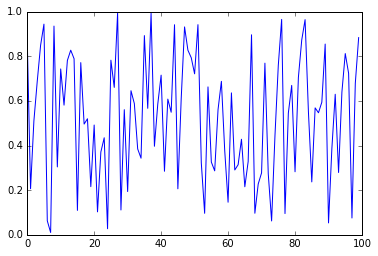

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.random.rand(100));

### Help functions and more info

- The ``%magic`` function will tell you all about magic commands
- The ``%lsmagic`` function will list all available magic commands
- Remember that the ``?`` can be used to get documentation!
- Though we won't cover it here, it is possible to [create and activate your own magic commands](https://ipython.org/ipython-doc/stable/config/custommagics.html)

In [6]:
%lsmagic

In [ ]:
%magic

In [27]:
%debug?

## Shell Commands

IPython is meant to be an all-purpose scientific computing environment, and access to the shell is critical.
Any command that starts with an exclamation point will be passed to the shell.

Note that because windows has a different kind of shell than Linux/OSX, shell commands will be different from operating system to operating system.

All the commands you have learned previously will work here:

In [ ]:
!ls

In [ ]:
!pwd

You can even seamlessly pass values to and from the Python interpreter.
For example, we can store the result of a directory listing:

In [29]:
contents = !ls

In [30]:
contents

['(Completed) IPython Notebook In Depth.ipynb',
 'IPython Notebook In Depth.ipynb',
 'LorenzSystem.ipynb',
 'WidgetsDemo.ipynb',
 'myscript.py']

We can inject Python variables into a shell command with ``{}``:

In [32]:
!cat {contents[4]}


def foo(x):
    return x ** 2

z = foo(12)

print(foo(14))

In [37]:
for filename in contents:
    if filename.endswith('.py'):
        print(filename)
        !head -10 {filename}

myscript.py

def foo(x):
    return x ** 2

z = foo(12)

print(foo(14))

With these tools, you should never have to switch from IPython to a terminal to run a command.

## IPython Widgets

One incredibly useful feature of the notebook is the interactivity provided by the [``ipywidgets`` package](https://github.com/ipython/ipywidgets). You'll have to install this using, e.g.

    $ conda install ipywidgets
    
You can find a full set of documentation notebooks [here](https://github.com/ipython/ipywidgets/blob/master/examples/notebooks/Index.ipynb).
We're going to walk through a quick demonstration of the functionality in [WidgetsDemo.ipynb](WidgetsDemo.ipynb)